<a href="https://colab.research.google.com/github/Lissiu/scNET/blob/main/%E2%80%9CscNET_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **scNET: Learning Context-Specific Gene and Cell Embeddings by Integrating Single-Cell Gene Expression Data with Protein-Protein Interaction Information**

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os, numpy as np, pandas as pd, scanpy as sc

def save_model(model_name, obj, embedded_genes, embedded_cells,
               node_features, out_features, recon_obj=None,
               base_dir="/content/drive/MyDrive/scNET_saved"):

    save_dir = os.path.join(base_dir, model_name)
    os.makedirs(save_dir, exist_ok=True)

    # --- 保存 AnnData ---
    obj.write(os.path.join(save_dir, f"{model_name}_obj.h5ad"))
    if recon_obj is not None:
        recon_obj.write(os.path.join(save_dir, f"{model_name}_recon.h5ad"))

    # --- 保存 embeddings ---
    np.save(os.path.join(save_dir, "embedded_genes.npy"), embedded_genes)
    np.save(os.path.join(save_dir, "embedded_cells.npy"), embedded_cells)
    np.save(os.path.join(save_dir, "out_features.npy"), out_features)

    # --- 保存 node_features ---
    try:
        node_features.to_csv(os.path.join(save_dir, "node_features.csv"))
    except:
        np.save(os.path.join(save_dir, "node_features.npy"), node_features)

    print(f"✅ 模型 {model_name} 已成功保存到：{save_dir}")



In [6]:
def load_model(model_name, base_dir="/content/drive/MyDrive/scNET_saved"):
    load_dir = os.path.join(base_dir, model_name)

    # ---- 加载 AnnData ----
    obj = sc.read_h5ad(os.path.join(load_dir, f"{model_name}_obj.h5ad"))

    recon_path = os.path.join(load_dir, f"{model_name}_recon.h5ad")
    recon_obj = sc.read_h5ad(recon_path) if os.path.exists(recon_path) else None

    # ---- 加载 embedding ----
    embedded_genes = np.load(os.path.join(load_dir, "embedded_genes.npy"))
    embedded_cells = np.load(os.path.join(load_dir, "embedded_cells.npy"))
    out_features   = np.load(os.path.join(load_dir, "out_features.npy"))

    # ---- 加载 node_features ----
    node_csv = os.path.join(load_dir, "node_features.csv")
    if os.path.exists(node_csv):
        node_features = pd.read_csv(node_csv, index_col=0)
    else:
        node_features = np.load(os.path.join(load_dir, "node_features.npy"))

    print(f"📦 已加载模型：{model_name}")
    return obj, embedded_genes, embedded_cells, node_features, out_features, recon_obj


**Install scnet using pip**

**It may be necessary to restart (not delete) the runtime after installing scNET in Google Colab. We are working on fixing this issue in future releases.**

In [4]:
!pip install scnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.

**Download example data**

In [8]:
import gdown
download_url = f'https://drive.google.com/uc?id=1C_G14cWk95FaDXuXoRw-caY29DlR9CPi'
output_path = './example.h5ad'
gdown.download(download_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1C_G14cWk95FaDXuXoRw-caY29DlR9CPi
From (redirected): https://drive.google.com/uc?id=1C_G14cWk95FaDXuXoRw-caY29DlR9CPi&confirm=t&uuid=e0a4293d-435c-4928-8d2d-c74a68f647d4
To: /content/example.h5ad
100%|██████████| 1.36G/1.36G [00:14<00:00, 96.8MB/s]


'./example.h5ad'

# Import scNET and model traning

In [9]:
import scNET
import scanpy as sc

#For faster processing in medium to large datasets (e.g. 30K or above cells), the maximum cells batch size can be increased depending on the available GPU memory.

# #For GPU with 24GB memory
# scNET.main.MAX_CELLS_BATCH_SIZE = 3000

# #for GPU with 40GB memory
# scNET.main.MAX_CELLS_BATCH_SIZE = 4000

# #For GPU with 80GB memory or more
# scNET.main.MAX_CELLS_BATCH_SIZE = 8000

# #otherwize, do not change the default value

In [10]:
#To control the cutoff of gene expression, the minimum precetage of cells expressing a gene can be adjusted. The default all expressed genes are considered.
#For example, to consider genes expressed in at least 5% of cells
scNET.main.EXPRESSION_CUTOFF = 0.05

In [11]:
#For larger dataset (10K or above), containing larger number of subcommunities, the number of encoder layers could be increased to 4 or more. the default value is 3.
scNET.main.NUM_LAYERS = 2

In [12]:
#To control the number of deifferentially expressed genes, the default value is 2000
#For example, to consider 3500 DE genes
scNET.main.DE_GENES_NUM = 800


In [13]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118
!pip install torch_geometric torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.1+cu118.html


Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchvision 0.23.0+cu126
Uninstalling torchvision-0.23.0+cu126:
  Successfully uninstalled torchvision-0.23.0+cu126
Found existing installation: torchaudio 2.8.0+cu126
Uninstalling torchaudio-2.8.0+cu126:
  Successfully uninstalled torchaudio-2.8.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement torch==2.0.1 (from versions: 2.2.0+cu118, 2.2.1+cu118, 2.2.2+cu118, 2.3.0+cu118, 2.3.1+cu118, 2.4.0+cu118, 2.4.1+cu118, 2.5.0+cu118, 2.5.1+cu118, 2.6.0+cu118, 2.7.0+cu118, 2.7.1+cu118)
ERROR: No matching distribution found for torch==2.0.1
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 4.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ e

## run_scNET arguments:
 **obj (AnnData, optional):** AnnData obj.

  **pre_processing_flag (bool, optional):** If True, perform pre-processing steps.

  **human_flag (bool, optional):** Controls gene name casing in the network.

  **number_of_batches (int, optional):** Number of mini-batches for the training.

  **split_cells (bool, optional):** If True, split by cells instead of edges during training. If using A100 could be True (for 10K cells or less)

  **n_neighbors (int, optional):** Number of neighbors for building the adjacency graph.

  **max_epoch (int, optional):** Max number of epochs for model training (recommended 250-300, and for larger dataset consider also 300-350).

  **model_name (str, optional):** Identifier for saving the model outputs.
  
  **save_model_flag (bool, optional):** If True, save the trained model.

In [14]:
obj = sc.read_h5ad("./example.h5ad")
scNET.run_scNET(obj, pre_processing_flag=False, human_flag=False, number_of_batches=5, split_cells=True, max_epoch=150, model_name = "test")


/usr/local/lib/python3.12/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (7107, 9019)
Highly variable genes: 3501


Training: 100%|██████████| 150/150 [47:00<00:00, 18.80s/it]

Best Network AUC: 0.879818518900539



# Using the model's outputs

**Load all the relevant embeddings**


In [21]:
save_model(
    model_name="test",
    obj=obj,
    embedded_genes=embedded_genes,
    embedded_cells=embedded_cells,
    node_features=node_features,
    out_features=out_features,
    recon_obj=recon_obj   # 如果你构建了 recon_obj
)


✅ 模型 test 已成功保存到：/content/drive/MyDrive/scNET_saved/test


In [22]:
obj, embedded_genes, embedded_cells, node_features, out_features, recon_obj = load_model("test")


📦 已加载模型：test


In [17]:
embedded_genes, embedded_cells, node_features , out_features =  scNET.load_embeddings("test")

**Create Scanpy object based on the reconstructed gene expression**


In [18]:
cell_types = {"0":"Macrophages","1":"Macrophages","2":"CD8 Tcells","3":"Microglia","4":"Cancer","5":"CD4 Tcells","6":"B Cells","10":"Prolifrating Tcells","8":"Cancer","11":"NK"}
obj.obs["Cell Type"] = obj.obs.seurat_clusters.map(cell_types)
recon_obj = scNET.create_reconstructed_obj(node_features, out_features, obj)

**Plot marker genes**

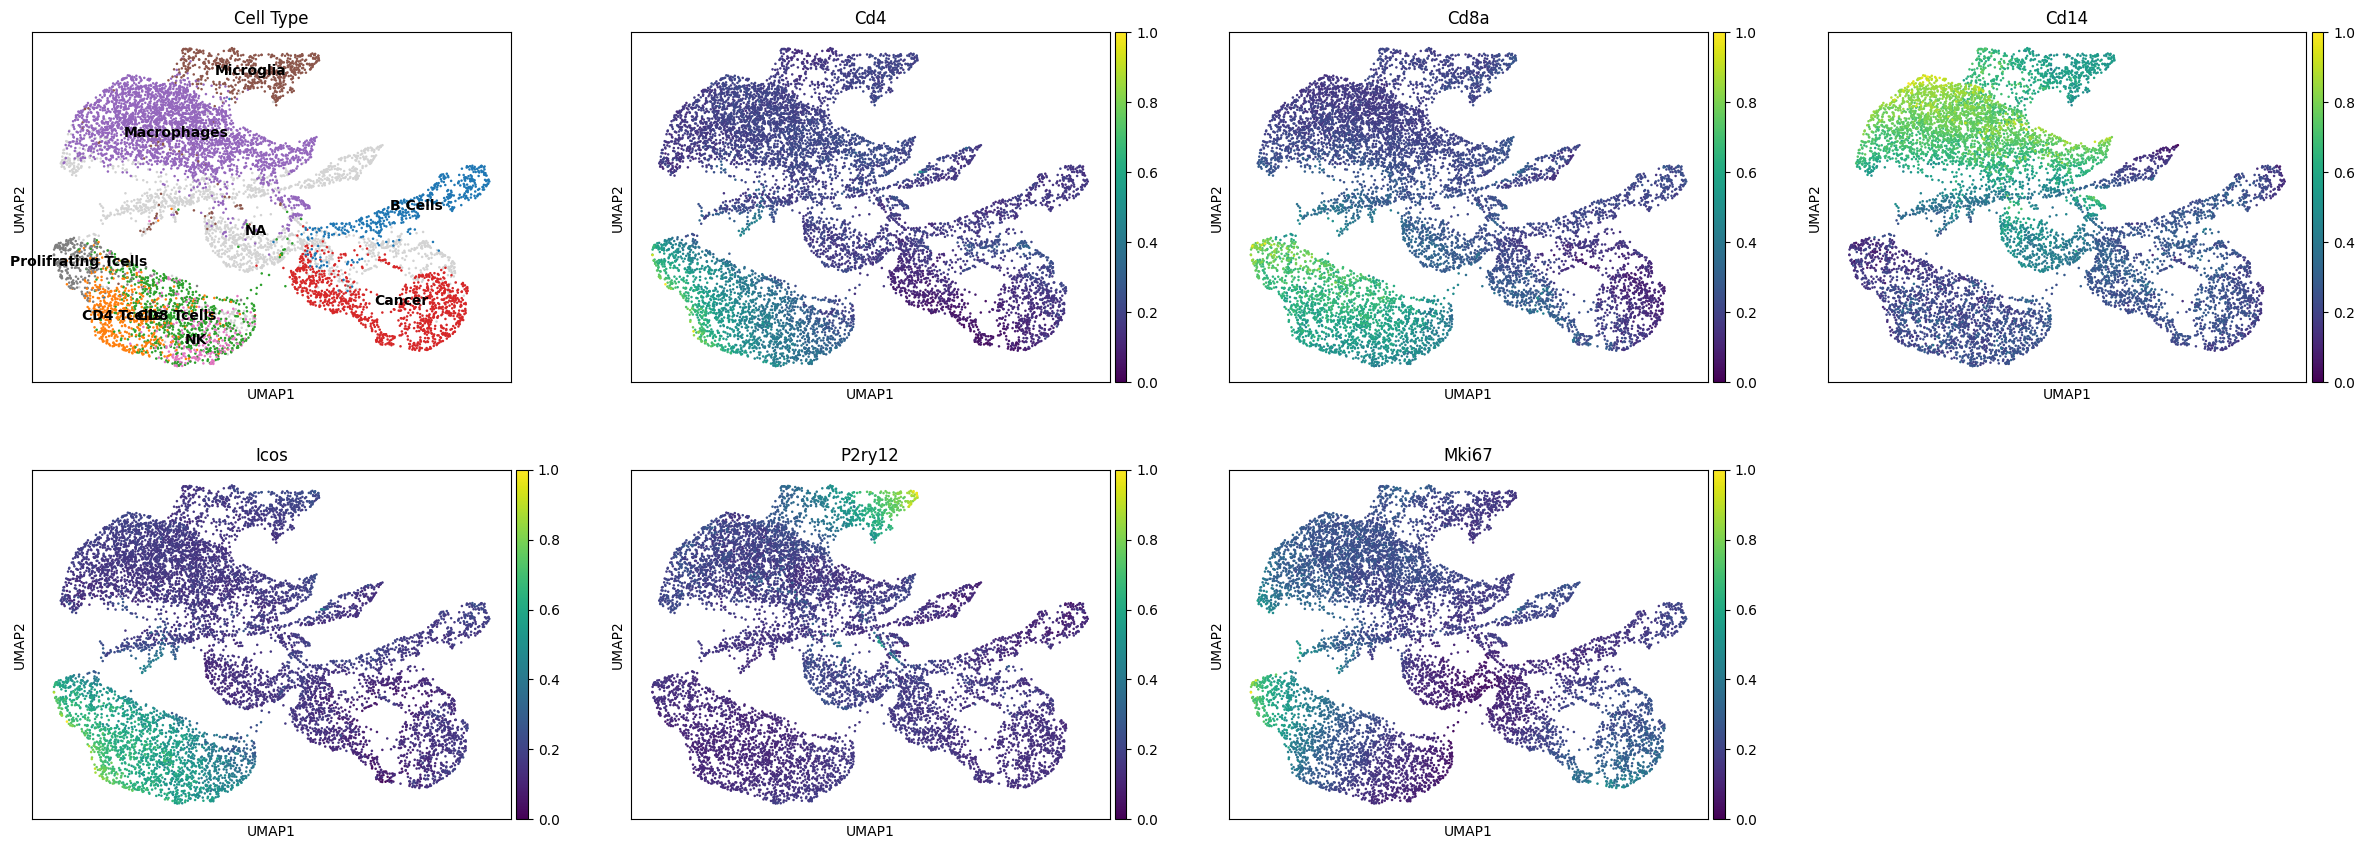

In [19]:
sc.pl.umap(recon_obj, color=["Cell Type","Cd4","Cd8a","Cd14","Icos","P2ry12","Mki67"], show=True, legend_loc='on data')

**Example of Calculating Marker Gene AUPR**

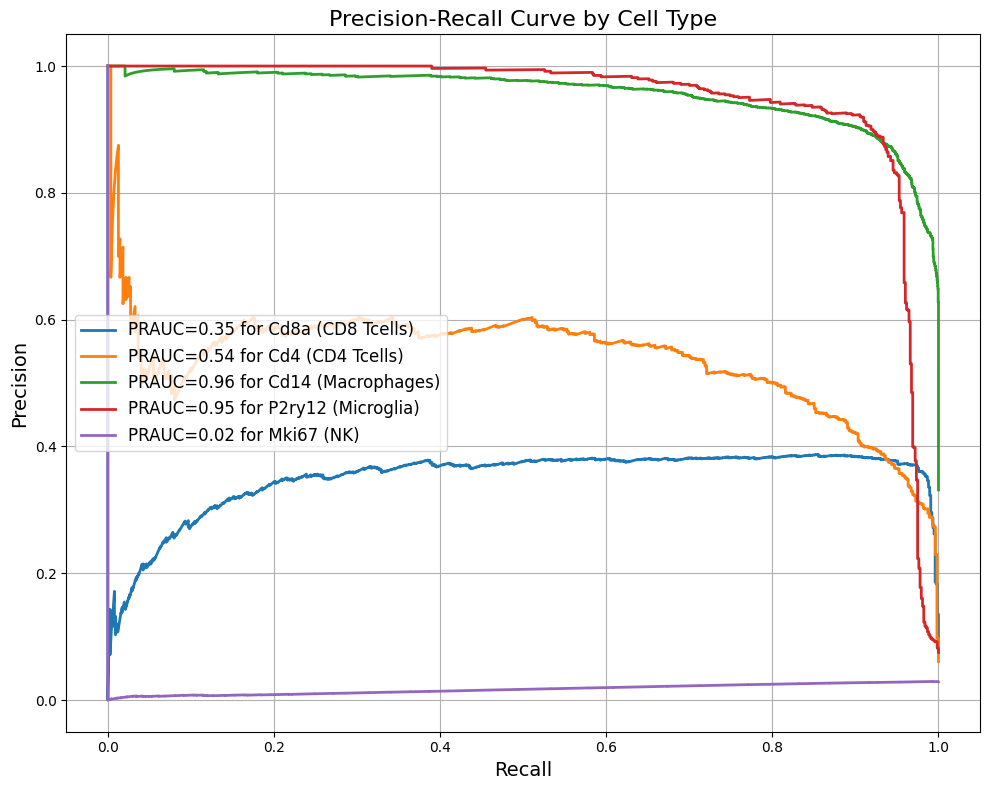

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from itertools import cycle

def calculate_marker_gene_aupr(adata, marker_genes, cell_types):
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
    plt.figure(figsize=(10, 8))

    for marker_gene, cell_type, color in zip(marker_genes, cell_types, colors):
        gene_expression = adata[:, marker_gene].X.toarray().flatten()
        binary_labels = (adata.obs["Cell Type"].isin(cell_type)).astype(int)

        precision, recall, _ = precision_recall_curve(binary_labels, gene_expression)
        aupr = auc(recall, precision)
        plt.plot(recall, precision, color=color, lw=2,
                 label=f'PRAUC={aupr:.2f} for {marker_gene} ({cell_type[0]})')

    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curve by Cell Type', fontsize=16)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
#calculate_marker_gene_aupr(recon_obj,['Cd8a','Cd4','Cd14',"P2ry12","Ncr1","Mki67","Tert"],[["CD8 Tcells"],['CD4 Tcells'], ['Macrophages'], ['Microglia'], ["NK"],["Prolifrating Tcells"],["Cancer"]])
calculate_marker_gene_aupr(recon_obj,['Cd8a','Cd4','Cd14',"P2ry12","Mki67"],[["CD8 Tcells"],['CD4 Tcells'], ['Macrophages'], ['Microglia'], ["NK"],["Prolifrating Tcells"],["Cancer"]])




## GO Semantic Similarity

Download the Semantic Similarity table calculated using the GoSemSim package in R.



In [23]:
import gdown
download_url = f'https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU'
output_path = './sim.csv'
gdown.download(download_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU
From (redirected): https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU&confirm=t&uuid=7b822cea-2da5-4946-9503-2199df7fd37a
To: /content/sim.csv
100%|██████████| 868M/868M [00:15<00:00, 54.9MB/s]


'./sim.csv'

Filter out uninformative genes

In [24]:
import pandas as pd
import numpy as np
sim = pd.read_csv("./sim.csv", index_col=0)
fil = (sim == 1).sum() > 4000
sim = sim.loc[~fil,~fil]
sim

,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,...,MATN4,SRMS,IGLV11-55,RASL10A,RBFOX2,SLC16A8,TAFA5,MIOX,TREX2,AVPR2
NOC2L,1.000,0.230,0.287,0.270,0.232,0.276,0.232,0.339,0.156,0.145,...,0.206,0.236,0.169,0.354,0.334,0.019,0.199,0.087,0.347,0.280
KLHL17,0.230,1.000,0.112,0.074,0.183,0.367,0.191,0.124,0.267,0.086,...,0.334,0.227,0.116,0.156,0.199,0.051,0.171,0.090,0.124,0.171
PLEKHN1,0.287,0.112,1.000,0.200,0.185,0.179,0.253,0.285,0.115,0.149,...,0.078,0.169,0.165,0.196,0.273,0.035,0.170,0.120,0.272,0.165
HES4,0.270,0.074,0.200,1.000,0.137,0.227,0.138,0.329,0.128,0.205,...,0.057,0.130,0.138,0.118,0.436,0.031,0.110,0.104,0.413,0.147
ISG15,0.232,0.183,0.185,0.137,1.000,0.284,0.256,0.271,0.126,0.170,...,0.178,0.456,0.226,0.645,0.233,0.030,0.192,0.255,0.429,0.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLC16A8,0.019,0.051,0.035,0.031,0.030,0.036,0.042,0.041,0.073,0.021,...,0.030,0.031,0.074,0.035,0.031,1.000,0.036,0.016,0.027,0.037
TAFA5,0.199,0.171,0.170,0.110,0.192,0.312,0.486,0.151,0.122,0.062,...,0.137,0.314,0.148,0.736,0.305,0.036,1.000,0.083,0.113,0.431
MIOX,0.087,0.090,0.120,0.104,0.255,0.101,0.101,0.108,0.078,0.145,...,0.062,0.155,0.105,0.069,0.194,0.016,0.083,1.000,0.215,0.097
TREX2,0.347,0.124,0.272,0.413,0.429,0.364,0.209,0.426,0.114,0.351,...,0.092,0.382,0.231,0.098,0.791,0.027,0.113,0.215,1.000,0.207


Find the intersection between the genes in the similarity matrix and the genes in the embedding, reconstructed gene expression, or counts matrix.



In [25]:
row_embedding_df = pd.DataFrame(embedded_genes, index=list(map(lambda x: x.upper(), node_features.index)))
inter = row_embedding_df.index.intersection(sim.index)
row_embedding_df = row_embedding_df.loc[inter]
sim = sim.loc[inter,inter]
row_embedding_df

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
ABL1,0.120996,0.118221,0.092277,0.012223,-0.395364,0.351081,0.104552,-0.330352,-0.039843,-0.191755,...,0.317997,0.333022,0.118081,0.145176,-0.377235,0.014674,0.091554,-0.339341,-0.169566,0.340107
CDKN1A,0.358803,0.232111,0.150696,0.000757,-0.194292,-0.020070,0.237230,-0.392419,-0.199463,0.280558,...,0.344829,0.303098,0.411795,0.388471,-0.456392,0.091677,-0.104838,-0.060892,-0.063962,-0.098321
PARP1,0.490490,0.367060,0.144785,-0.064178,-0.166432,-0.110084,0.311492,-0.595135,-0.250436,0.443735,...,0.286219,0.275131,0.359736,0.439610,-0.572634,0.023937,-0.190015,0.011638,0.054069,-0.274708
AKT1,0.302658,0.133532,0.013265,-0.091753,-0.418367,0.459224,0.302749,-0.581130,-0.162427,-0.198158,...,0.321231,0.505880,0.273873,0.216747,-0.510655,0.215115,0.246398,-0.600422,-0.188790,0.336429
APP,1.204602,1.358094,0.672543,-1.116361,-1.160048,-0.438238,1.876858,-1.521199,-2.153420,-0.702560,...,-1.017887,0.644915,-0.446031,0.150290,-0.865143,-0.730575,-0.519988,-0.372050,2.259217,0.432349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DPM3,-0.056833,-0.112532,-0.056673,0.033078,-0.027518,-0.014091,-0.050556,-0.020133,0.046304,0.066685,...,-0.027795,0.029363,0.036300,-0.080395,0.191227,0.070745,-0.110866,0.060094,-0.005872,-0.082317
DPM2,-0.108144,-0.153262,-0.097304,0.034502,-0.006235,-0.029841,-0.074391,0.040725,0.145933,0.100080,...,-0.073678,-0.005397,0.065659,-0.089500,0.275672,0.088615,-0.088717,0.120773,-0.030087,-0.175653
BORCS7,-0.152210,-0.109300,-0.045818,0.100089,0.027173,-0.047893,-0.164561,0.143055,0.097658,0.039934,...,0.035995,-0.070032,-0.004037,0.008240,0.136722,0.066055,-0.043151,0.143504,-0.036434,-0.005659
KDM7A,-0.124502,-0.119067,-0.116236,0.048560,0.001707,-0.095821,-0.024794,-0.008515,0.184605,0.148443,...,-0.091913,0.058475,0.098535,0.002430,0.195311,0.107913,-0.175402,0.181117,-0.004276,-0.182806


In [26]:
out_features_df = pd.DataFrame(out_features.T, index=list(map(lambda x: x.upper(), node_features.index)))
out_features_df = out_features_df.loc[inter]
out_features_df

,0,1,2,3,4,5,6,7,8,9,...,9005,9006,9007,9008,9009,9010,9011,9012,9013,9014
ABL1,-0.009180,0.027454,-0.019476,-0.076323,-0.077806,-0.023677,-0.046256,-0.041604,-0.036610,-0.035842,...,-0.007144,0.017452,-0.330497,-0.044574,-0.046541,-0.048027,-0.044048,-0.348510,-0.106087,0.009643
CDKN1A,-0.069164,0.166460,0.018966,-0.015382,0.032242,0.062290,0.033896,0.012775,0.073645,0.010039,...,-0.094027,-0.056304,-0.235022,0.091740,0.077759,-0.124504,0.086755,-0.296668,0.001849,-0.066456
PARP1,0.190187,0.074574,0.291363,0.175266,0.014916,0.022674,-0.066146,0.220874,0.047782,0.077639,...,0.119038,0.214223,-0.214998,0.011409,0.030338,0.086858,0.002756,-0.280968,-0.001085,0.203986
AKT1,0.053800,0.194734,0.224428,0.103786,-0.032596,0.059163,-0.016775,0.229570,0.037321,0.027423,...,0.008082,0.089565,-0.422481,0.027478,0.027263,-0.050044,0.018265,-0.387691,-0.022505,0.066171
APP,0.163847,0.326118,0.422800,0.328142,0.145251,-0.026167,0.005404,0.390588,0.152378,0.183855,...,0.072515,0.166013,-0.113283,0.144516,0.146700,0.050919,0.109429,-0.210996,0.176242,0.154525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DPM3,0.188593,0.140739,0.222579,0.192605,-0.032867,-0.078701,-0.082400,0.208156,0.039106,0.000943,...,0.111289,0.156180,-0.041735,-0.018252,-0.008672,0.132426,-0.041814,-0.194965,0.072254,0.173866
DPM2,0.063393,-0.153685,0.092866,0.091497,0.001760,-0.038995,-0.054566,0.075705,0.060774,0.013862,...,-0.042389,0.050384,-0.140439,0.032353,0.023128,-0.068571,-0.002376,-0.372888,-0.081960,0.028283
BORCS7,-0.045111,-0.061651,-0.119065,-0.086907,0.013224,0.015773,0.074716,-0.150928,-0.024257,-0.015862,...,-0.030767,-0.057313,0.275041,-0.000326,-0.016058,0.029805,0.007096,0.341405,0.016588,-0.066236
KDM7A,-0.219358,-0.113765,-0.169395,-0.157044,0.003751,-0.021539,0.104158,-0.099563,0.003171,-0.007067,...,-0.093649,-0.204910,-0.168251,0.027933,0.014020,-0.098708,0.037078,-0.091142,-0.097683,-0.193058


In [27]:
node_features_df = pd.DataFrame(node_features.values, index=list(map(lambda x: x.upper(), node_features.index)))
node_features_df = node_features_df.loc[inter]
node_features_df

,0,1,2,3,4,5,6,7,8,9,...,9009,9010,9011,9012,9013,9014,9015,9016,9017,9018
ABL1,0.631628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.896135,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.59506,0.000000,0.000000,0.000000,0.000000
CDKN1A,0.000000,2.513924,2.294897,0.000000,2.806467,1.902295,0.876684,0.000000,2.344279,0.483211,...,3.217964,0.000000,2.900149,0.0,2.315192,0.00000,2.505024,2.728701,0.700835,1.359743
PARP1,0.631628,0.000000,0.421933,0.000000,0.396074,0.000000,0.000000,0.987792,0.000000,0.807611,...,0.559209,0.845701,1.043937,0.0,0.000000,0.59506,0.000000,0.000000,0.000000,0.000000
AKT1,0.000000,0.000000,0.421933,0.000000,0.000000,1.486310,0.876684,0.445817,0.545261,0.483211,...,0.915721,0.845701,0.000000,0.0,0.924713,0.00000,0.000000,0.951786,0.700835,0.544530
APP,0.000000,3.165755,1.287726,0.877381,1.768115,0.760923,1.888837,1.595818,1.677162,1.786777,...,1.177998,0.000000,2.047442,0.0,1.396811,0.00000,0.877750,1.752844,0.700835,2.986629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DPM3,0.000000,0.000000,0.717749,0.000000,0.396074,0.760923,1.336536,1.177751,0.545261,0.483211,...,0.915721,0.845701,0.800619,0.0,1.716215,0.00000,0.877750,0.951786,0.000000,0.000000
DPM2,1.015716,0.000000,0.000000,0.000000,0.396074,0.000000,0.000000,0.445817,0.000000,0.483211,...,0.000000,0.000000,0.000000,0.0,0.924713,0.00000,0.000000,0.951786,0.700835,0.895107
BORCS7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483211,...,0.000000,0.000000,0.800619,0.0,0.000000,0.00000,0.000000,0.000000,0.700835,0.544530
KDM7A,0.000000,0.000000,0.000000,0.000000,0.000000,1.486310,1.888837,0.000000,0.000000,0.483211,...,0.559209,1.297250,0.800619,0.0,0.000000,0.59506,0.000000,0.000000,0.000000,0.000000


Calculating the semantic similarity correlation

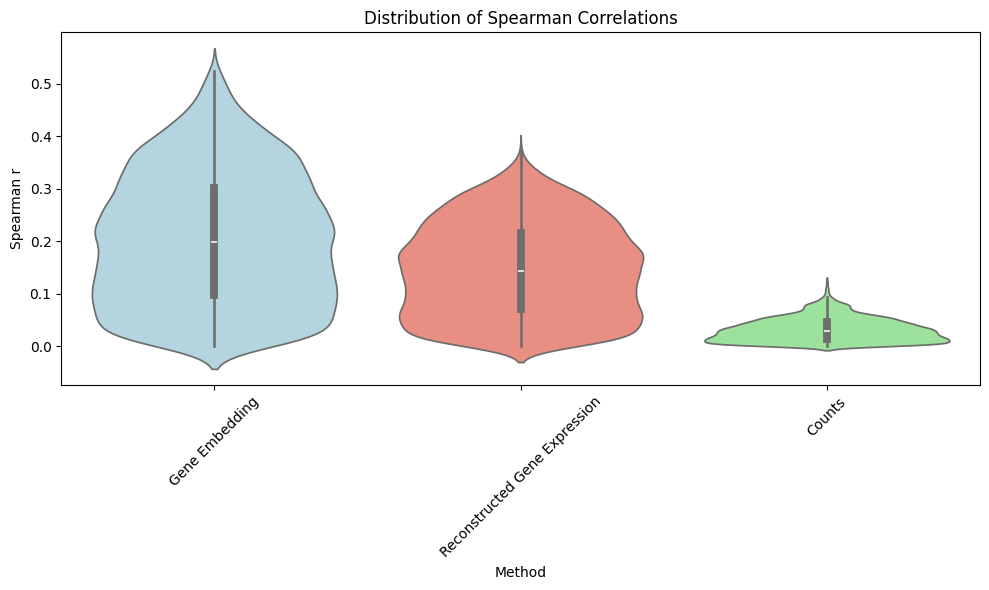

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import rankdata, spearmanr

def spearman_corr(matrix):
    ranked_matrix = np.apply_along_axis(rankdata, 1, matrix)
    return np.corrcoef(ranked_matrix)

def corr_analysis(corr, sim):
    sim_values = sim.values
    correlations = np.empty(sim.shape[0])
    for i in range(sim.shape[0]):
        correlations[i], _ = spearmanr(corr[i], sim_values[i])
    return np.abs(correlations)

def plot_corr_distributions(corr_matrices, names, sim):
    all_data = []

    for matrix, name in zip(corr_matrices, names):
        #corr = spearman_corr(matrix)
        corr = matrix.values @ matrix.T.values
        abs_corrs = corr_analysis(corr, sim)
        all_data.extend([(name, val) for val in abs_corrs])

    df = pd.DataFrame(all_data, columns=["Method","Correlation"])

    custom_palette = {
        names[0]: "lightblue",
        names[1]: "salmon",
        names[2]: "lightgreen"
    }

    plt.figure(figsize=(10, 6))
    sns.violinplot(x="Method", y="Correlation", data=df, palette=custom_palette)
    plt.title("Distribution of Spearman Correlations")
    plt.ylabel("Spearman r")
    plt.xlabel("Method")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_corr_distributions([row_embedding_df,out_features_df, node_features_df], names=["Gene Embedding","Reconstructed Gene Expression", "Counts"], sim=sim)

## **Propagation based signature projection for actvation of Tcells**



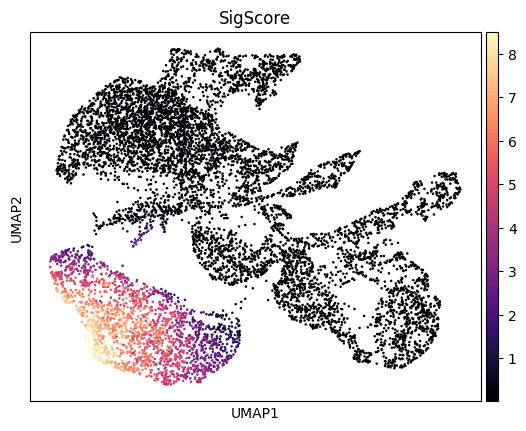

array([3.84285970e+00, 2.91653480e-02, 4.32535323e-03, ...,
       4.40442600e-02, 3.00740317e-03, 4.63570716e+00])

In [29]:
scNET.run_signature(recon_obj, up_sig=["Zap70","Lck","Fyn","Cd3g","Cd28","Lat"],alpha = 0.9)

**And for Tumor aggression**

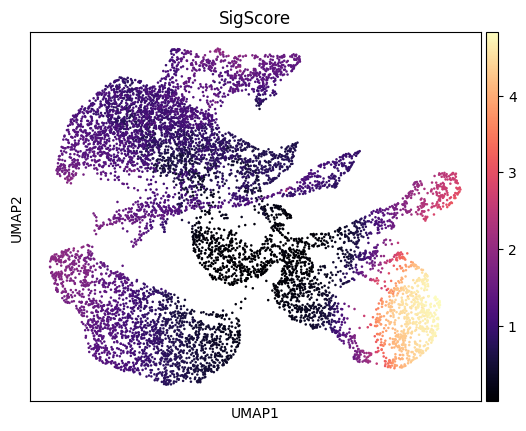

array([1.67605547, 2.07198538, 4.64378739, ..., 0.04166071, 1.36179281,
       1.73502588])

In [30]:

scNET.run_signature(recon_obj,up_sig=["Cdkn2a","Myc","Pten","Kras"])


**Creating the co-embedded network, is it modular?**

In [31]:
import networkx as nx
net, mod = scNET.build_co_embeded_network(embedded_genes, node_features)
print(f"The network mdularity: {mod}")

The network mdularity: 0.7785436594834109


##  Reconstract KEGG Pathways Example



### Re-embed the T-cells subset

In [32]:
obj = sc.read_h5ad("./example.h5ad")
sub_obj = obj[obj.obs["Cell Type"] == "CD8 Tcells"]
scNET.run_scNET(sub_obj, pre_processing_flag=False, human_flag=False, number_of_batches=3, split_cells=False, max_epoch=150, model_name = "Tcells")
embedded_genes, embedded_cells, node_features , out_features =  scNET.load_embeddings("Tcells")

/usr/local/lib/python3.12/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (5369, 753)


Training: 100%|██████████| 150/150 [11:18<00:00,  4.52s/it]

Best Network AUC: 0.8822880289830775


In [33]:
save_model(
    model_name="Tcells",
    obj=sub_obj,
    embedded_genes=embedded_genes,
    embedded_cells=embedded_cells,
    node_features=node_features,
    out_features=out_features,
    recon_obj=None
)


✅ 模型 Tcells 已成功保存到：/content/drive/MyDrive/scNET_saved/Tcells


In [34]:
sub_obj, embedded_genes_T, embedded_cells_T, node_features_T, out_features_T, _ = load_model("Tcells")


📦 已加载模型：Tcells


In [35]:
from scNET import coEmbeddedNetwork  as cen
import pandas as pd
def run_pathway_recon_anaylsis(gene_embedding, ref, threshold=40):
    '''
    Predicts KEGG pathway memberships using gene embeddings and reference data, and evaluates the performance using AUPR.

    Args:
        gene_embedding (np.ndarray): The matrix of gene embeddings.
        ref (pd.DataFrame): A reference dataset containing gene expression or other relevant features.

    Returns:
        pd.DataFrame: A DataFrame containing the AUPR scores for predictions from the gene embeddings and reference data.

    Method:
        - Annotates genes with KEGG pathway memberships using `crate_kegg_annot`.
        - Filters KEGG pathways to include those with at least 40 gene members.
        - Constructs co-embedded networks from both the embeddings and reference data.
        - Uses propagation to predict pathway memberships for each graph.
        - Evaluates the predictions using AUPR and plots the results.
    '''
    ref.index = list(map(lambda x: x.upper(),ref.index))
    annot = cen.crate_kegg_annot(ref.index)
    annot_threshold = annot.sum()>=threshold
    annot_threshold = annot_threshold[annot_threshold == True].sort_values(ascending=False).head(50)
    graph_embedded,_ = cen.build_co_embeded_network(gene_embedding,ref)
    graph_ref,_ = cen.build_co_embeded_network(ref,ref)
    kegg_pred = [cen.make_term_predication([graph_embedded,graph_ref], annot[term]) for term in annot_threshold.index]

    kegg_pred = np.array(kegg_pred).squeeze()
    df = pd.DataFrame({"AUPR" : kegg_pred.T.reshape(-1), "Method": ["scNET" for i in range(kegg_pred.shape[0])]  +  ["Counts" for i in range(kegg_pred.shape[0])]})

    fig, ax = plt.subplots(figsize=[10,7])
    fig.set_dpi(600)

    custom_palette =  ['darkturquoise', 'lightsalmon']

    sns.boxenplot(ax=ax, data=df,x="Method", y="AUPR", palette=custom_palette)
    sns.set_theme(style='white',font_scale=1.5)
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


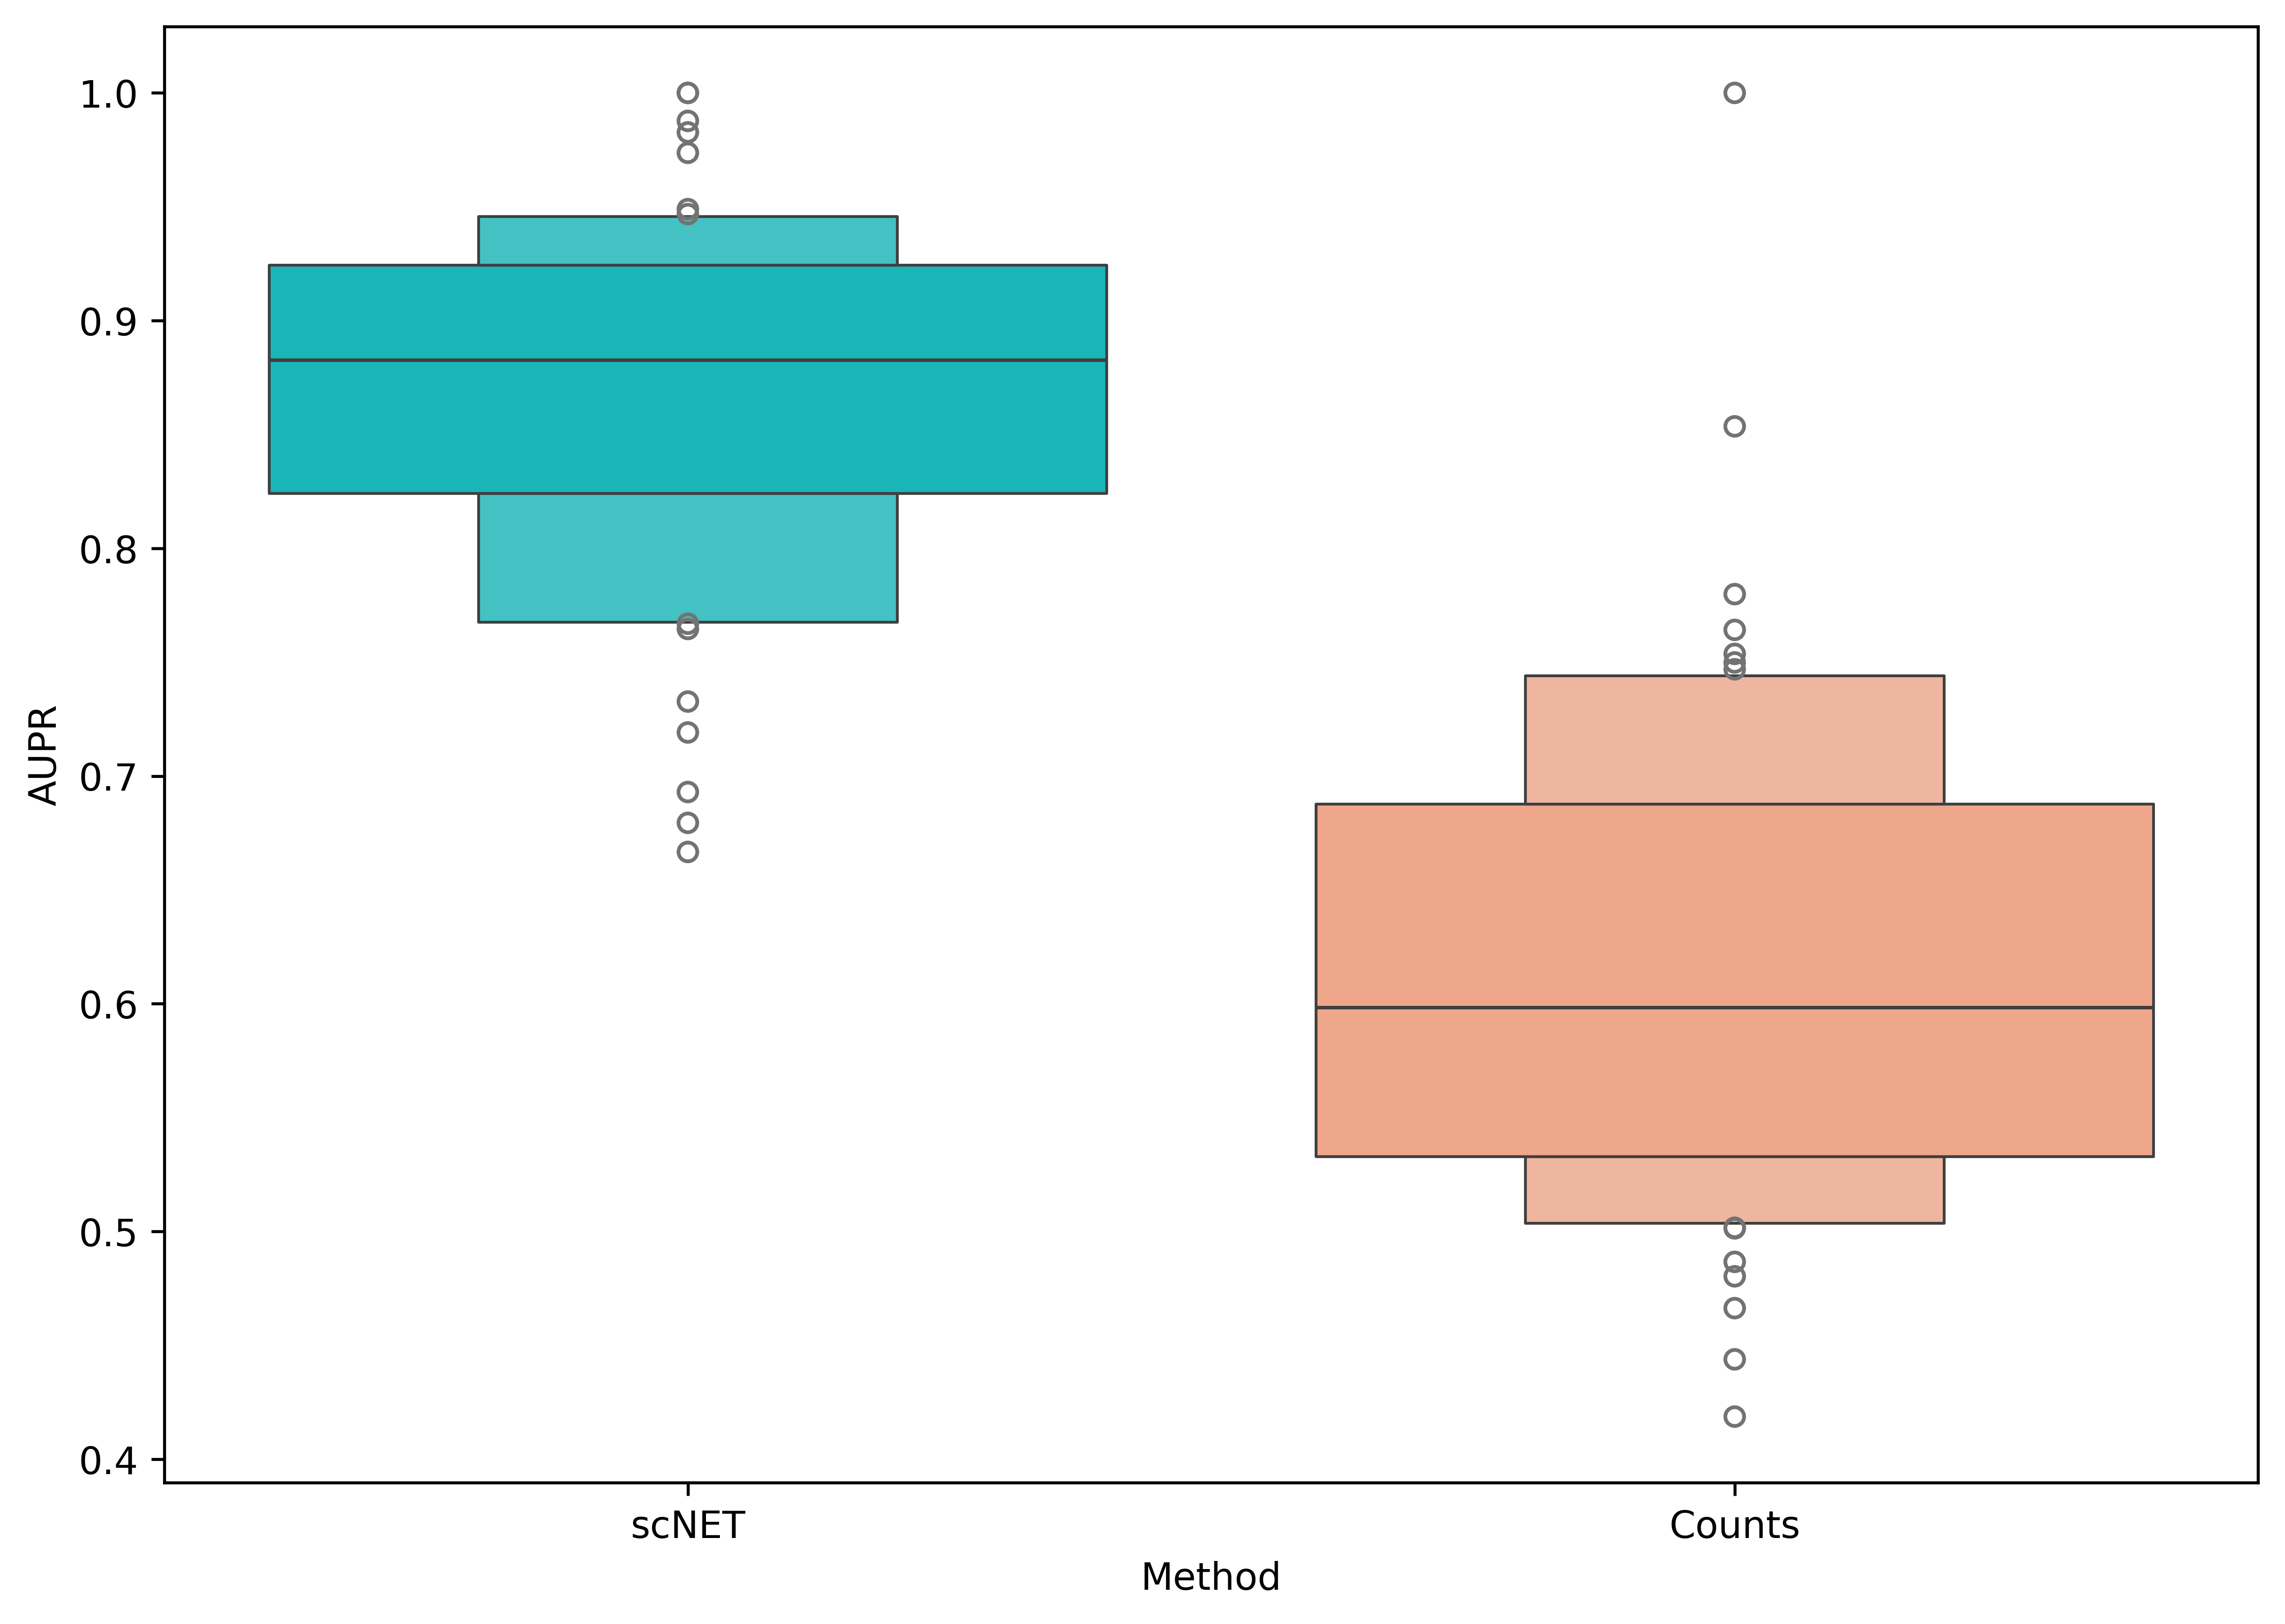

In [36]:

run_pathway_recon_anaylsis(embedded_genes,node_features)

**Finding differential enriched pathways**
### Can we see a difference in phenotype between Cancer, Microglia and Macrophages?








<Figure size 1000x3000 with 0 Axes>

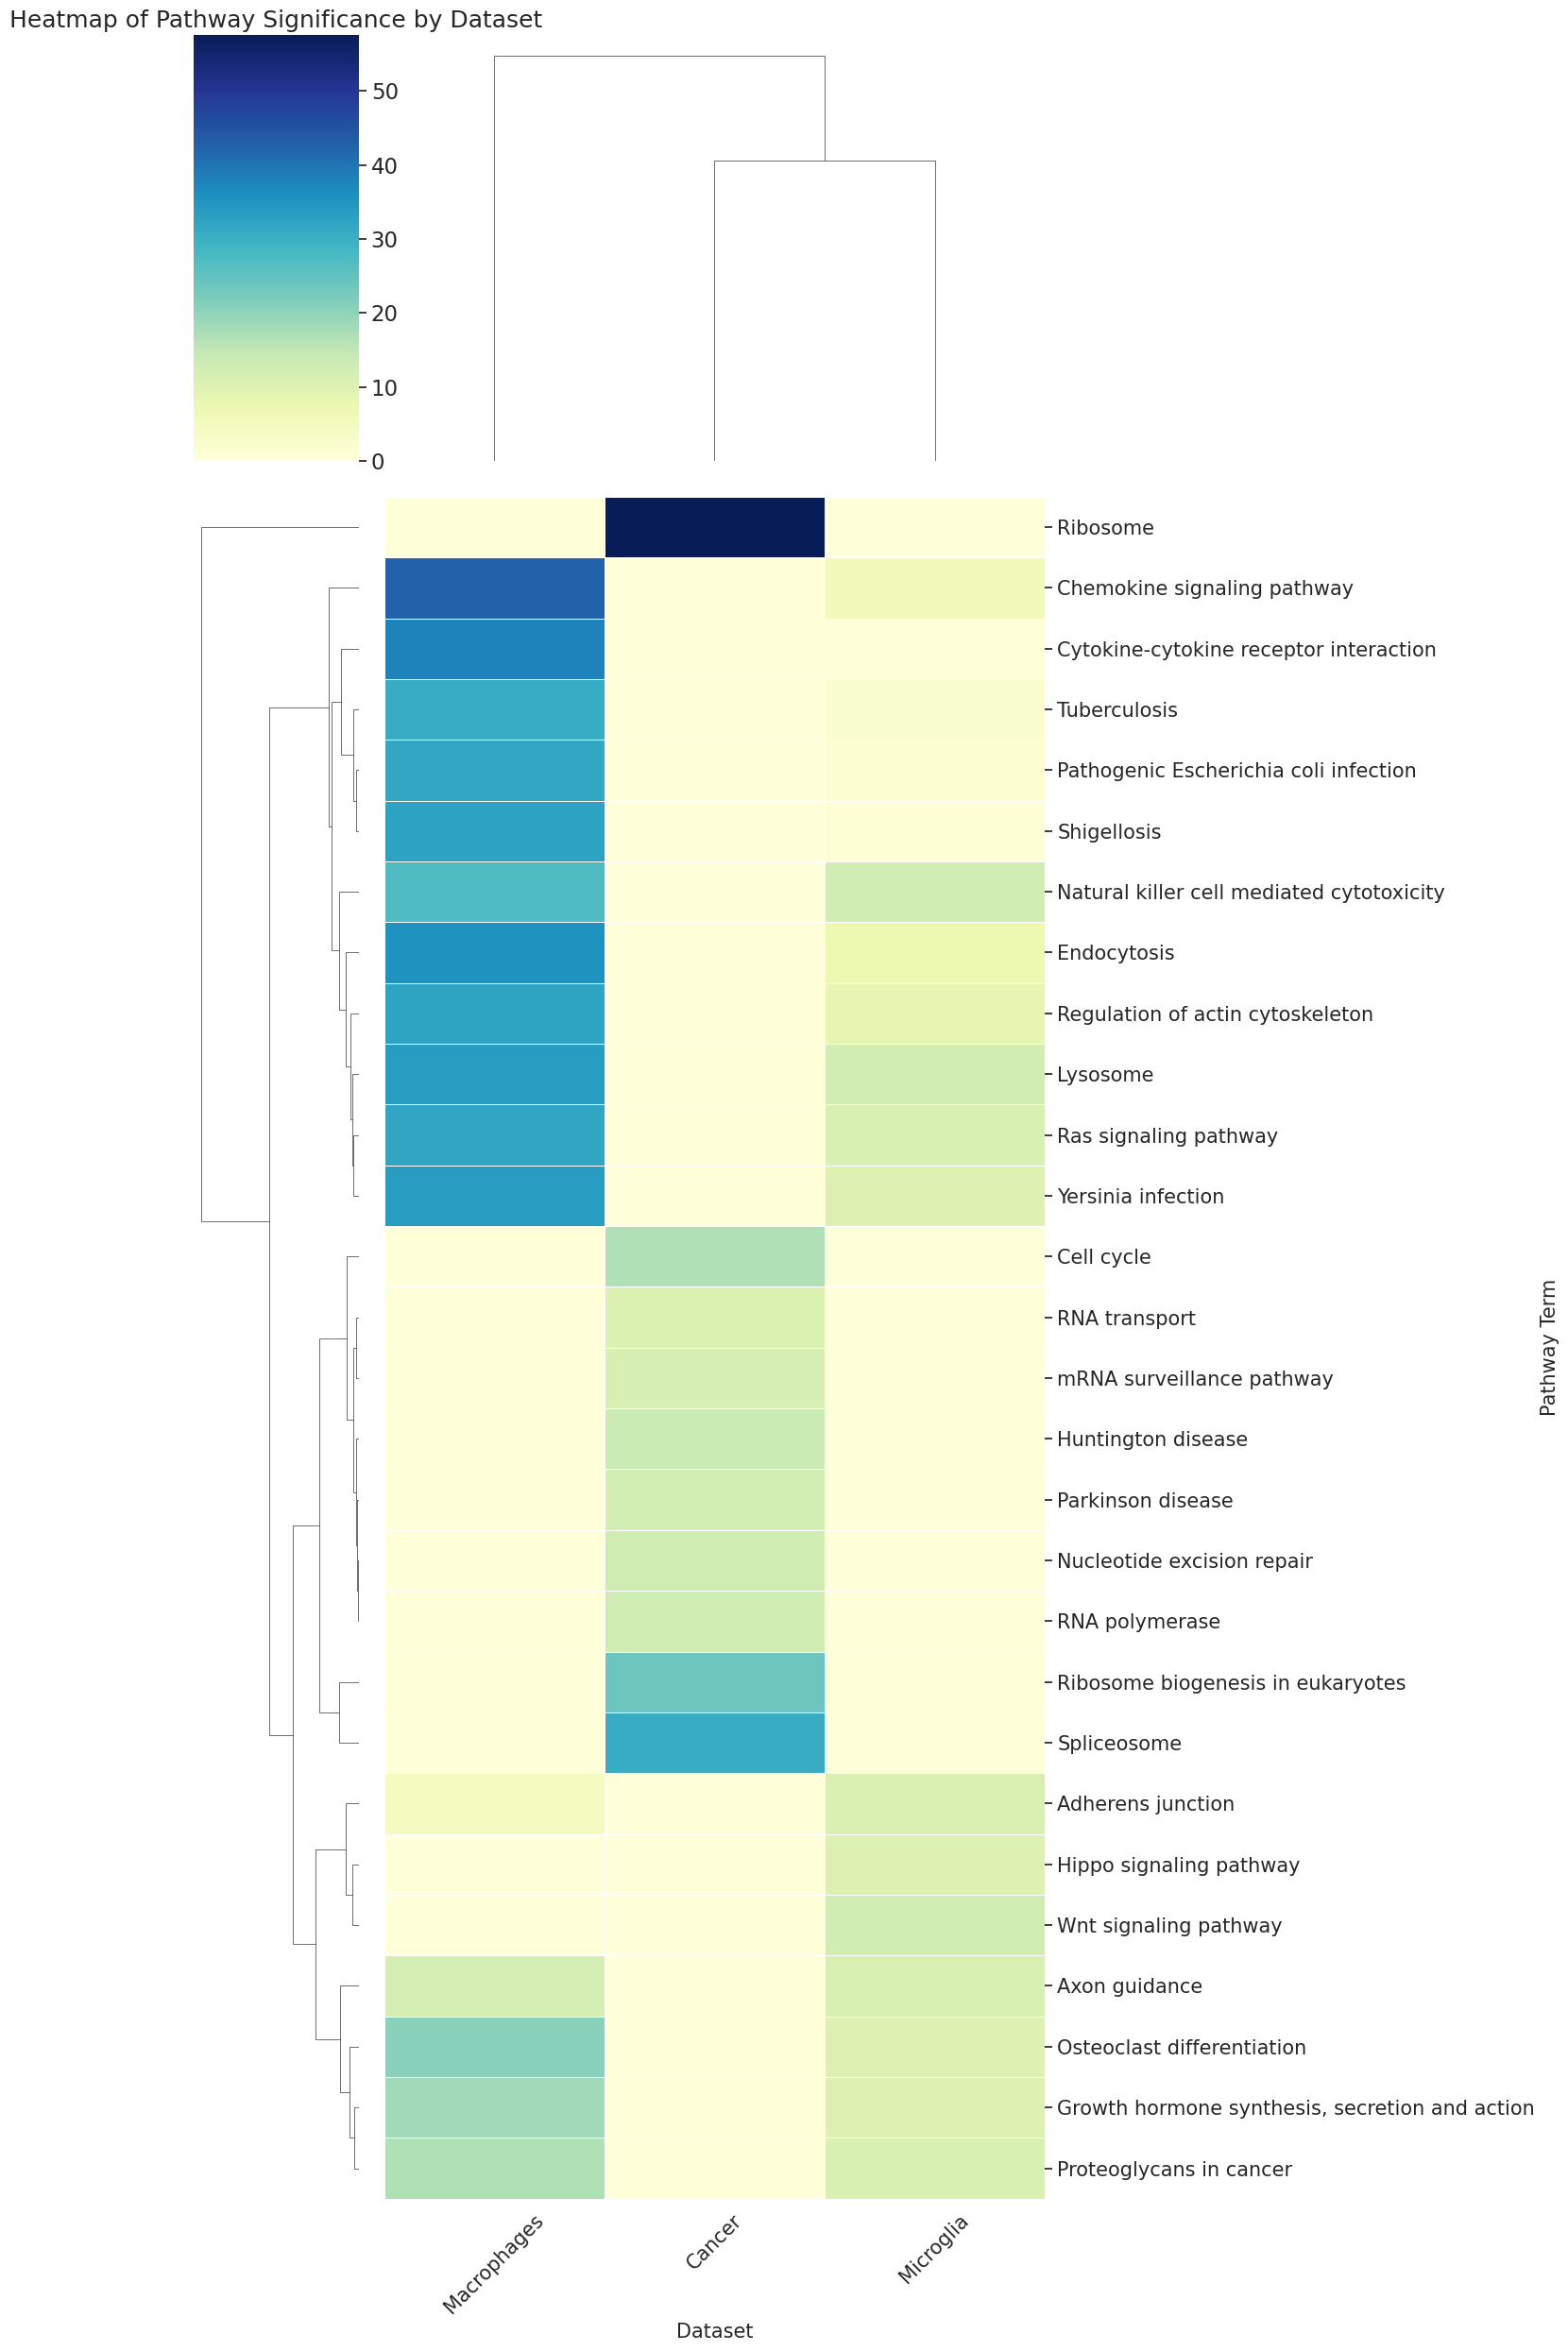

In [37]:
recon_obj.obs["Cell Type"] = recon_obj.obs.seurat_clusters.map(cell_types)
de_genes_per_group, significant_pathways, filtered_kegg, enrichment_results = scNET.pathway_enricment(recon_obj.copy()[recon_obj.obs["Cell Type"].isin(["Microglia","Macrophages","Cancer"])],groupby="Cell Type")
scNET.plot_de_pathways(significant_pathways,enrichment_results,10)